# Estimators and Percentiles

We want to compare the formulas of the uncertainties of the mean and the variance **estimators** with the actual data computed ones. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# plot options
rc = {"text.usetex": True,
      "font.family": "serif",
      "font.sans-serif": ["Computer Modern"]
     }
plt.rcParams.update(rc)

%config InlineBackend.figure_format='retina'

### Example for one distribution generation

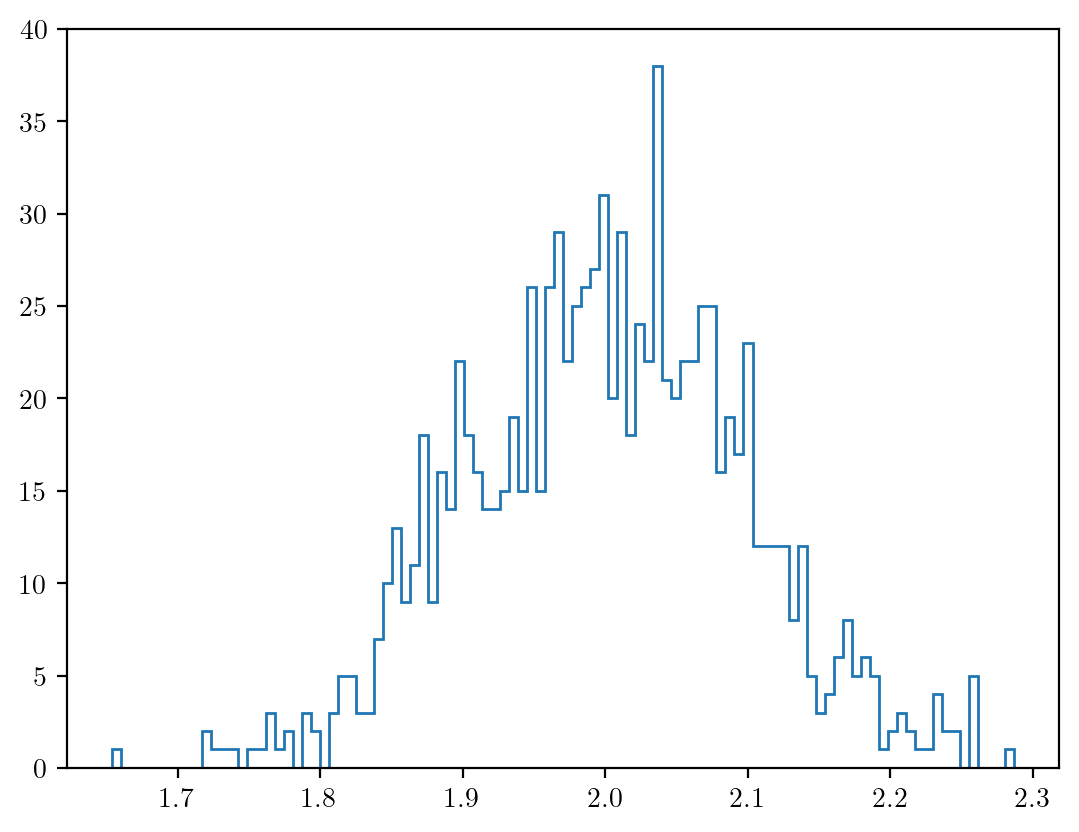

In [4]:
#let's generate some data
N = 1000
x_i = np.random.normal(2,.1,N)
plt.hist(x_i, color='C0',bins=100,histtype='step');
plt.ylim(0,40);

In [5]:
# now let's estimate the momenta with their respective errors
popmean = 1/N*np.sum(x_i)
popdev = x_i - popmean
popvar = 1/(N-1)*np.sum(popdev**2)

In [6]:
#the data momenta are calculated b
datamean = np.mean(x_i)
datavar = np.var(x_i)

In [7]:
headers = ['mean', 'variance']
print(f'{headers[0]: <15}{headers[1]}')
print('--------------------------')
print(f'{round(popmean,5): <15}{round(popvar,5)}')

mean           variance
--------------------------
2.00068        0.00949


To estimate the error and then compare it we need to
generate multiple datas and then compute the stdev of the datas and finaly compare it with the following definitions

In [8]:
sigmamean = popdev/np.sqrt(N)
sigmavar = np.sqrt(N)/np.sqrt(2*(N-1))*sigmamean
approx = np.sqrt(2)*sigmamean

### Example for (times) distributions

In [15]:
def estdev(times):
    #this is our data and our est errors
    x_i = np.random.normal(2,.1,N)
    sigmamean = np.var(x_i)/np.sqrt(N)
    sigmavar = np.sqrt(N)/np.sqrt(2*(N-1))*sigmamean
    
    
    means = np.empty(times)
    varss = np.empty(times)
    
    for i in range(times):
        #let's generate some data
        x_i = np.random.normal(2,.1,N)
        means[i] = np.mean(x_i)  #it's the same function
        varss[i] = np.var(x_i)


    # print output
    headers = ['mean_err', 'variance_err']
    print(f'{headers[0]: <15}{headers[1]}')
    print('--------------------------')
    print(f'{round(np.std(means),5): <15}{round(np.std(varss),5)}     mean errors from {times} distributions')
    print(f'{round(sigmamean,5): <15}{round(sigmavar,5)}     estimated deviation from true value from formulas') 
    print()

In [14]:
estdev(int(1e2))
estdev(int(1e3))
estdev(int(1e5))

mean_err       variance_err
--------------------------
0.00287        0.00044     mean errors from 100 distributions
0.00032        0.00023     estimated deviation from true value from formulas

mean_err       variance_err
--------------------------
0.00305        0.00044     mean errors from 1000 distributions
0.00031        0.00022     estimated deviation from true value from formulas

mean_err       variance_err
--------------------------
0.00318        0.00045     mean errors from 100000 distributions
0.00031        0.00022     estimated deviation from true value from formulas



I suspect something is wrong, the error estimate seems a bit too forgiving...

# Exercise

### 1. A gaussian integral

Using Monte Carlo integration, check that

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

- Does the result converge with the number of samples? And how does the error go down?
- Do it many times. For a given $N$, how are the result distributed? We'll talk about model fitting at lenght later on, but for now try to fit it by hand with a parametrized model. (If N is large enough you should get something that looks *very* accurate!)
- How does the distribution change if $N$ increases?

(Hint: think about sample mean and sample variance)

### 2. Kicking horses

A famous early  application of low-number statistics was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898.

He studied the distribution of 122 men kicked to death by horses among 10 Prussian army corps within 20 years (so a total number of corpes of 200). He recorded the number of corps with a given number of deaths:

| Number of deaths | Number of groups |
| --- | --- |
| 0 | 109 |
| 1 | 65 |
| 2 | 22 |
| 3 | 3 |
| 4 | 1 |

- Plot the resulting probability distribution. Careful with the normalization
- How does it look like? Again try to fit it by hand.

(Hint: think about sample mean and sample variance)
